### quest
- x='product',y='amount' 
- order by : top 3(amount)
- hue='type_of_contract2'

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd

In [2]:
df_TOCC=pd.read_csv("../../datasets/TypeOfContractChannel.csv")
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [3]:
df_TOCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [4]:
df_TOCC.describe(include=object)

,type_of_contract,type_of_contract2,channel,datetime,payment_type,product,state,overdue,bank,cancellation
count,51300,51303,51304,51304,51304,51303,51304,51302,48544,51279
unique,2,9,20,101,5,6,4,2,46,2
top,렌탈,Promotion,서비스 방문,2019-10-29,CMS,K1,계약확정,없음,국민은행,정상
freq,46481,15811,15186,817,32825,39134,50350,49112,9901,50372


In [5]:
df_TOCC.describe()

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


In [6]:
df_TOCC['product'].value_counts()

K1    39134
K2     8995
K3     2082
K5      645
K4      327
K6      120
Name: product, dtype: int64

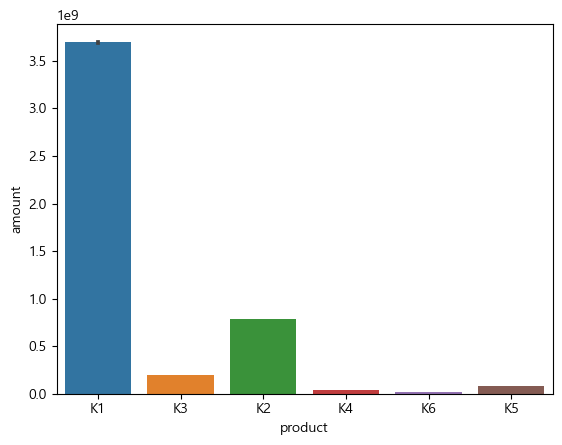

In [7]:
sns.barplot(data=df_TOCC, x='product', y='amount', estimator=sum) # 총합
plt.show()

In [8]:
df_TOCC_sum = pd.pivot_table(data=df_TOCC, index='channel', values='amount', aggfunc=sum)
# amount의 sum이 큰 순서대로 정렬했을 때 상위 3개 리스트 
df_TOCC_top_list=df_TOCC_sum.sort_values(by='channel', ascending=False).iloc[:3].index.to_list() 
df_TOCC_top_list

['홈플러스', '홈쇼핑/인터넷', '홈쇼핑/방송']

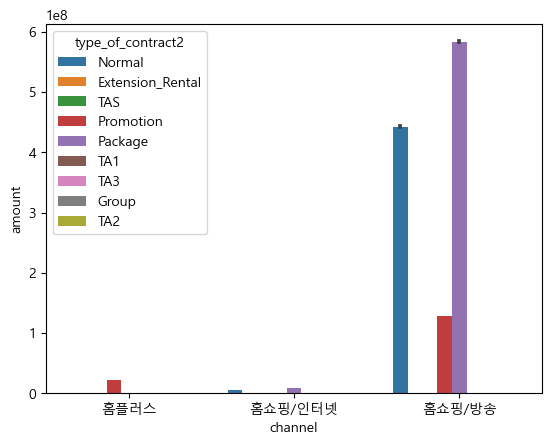

In [9]:
sns.barplot(data=df_TOCC, x='channel', y='amount', estimator=sum, order=df_TOCC_top_list, hue='type_of_contract2')
plt.show()